# Analisando probabilidades

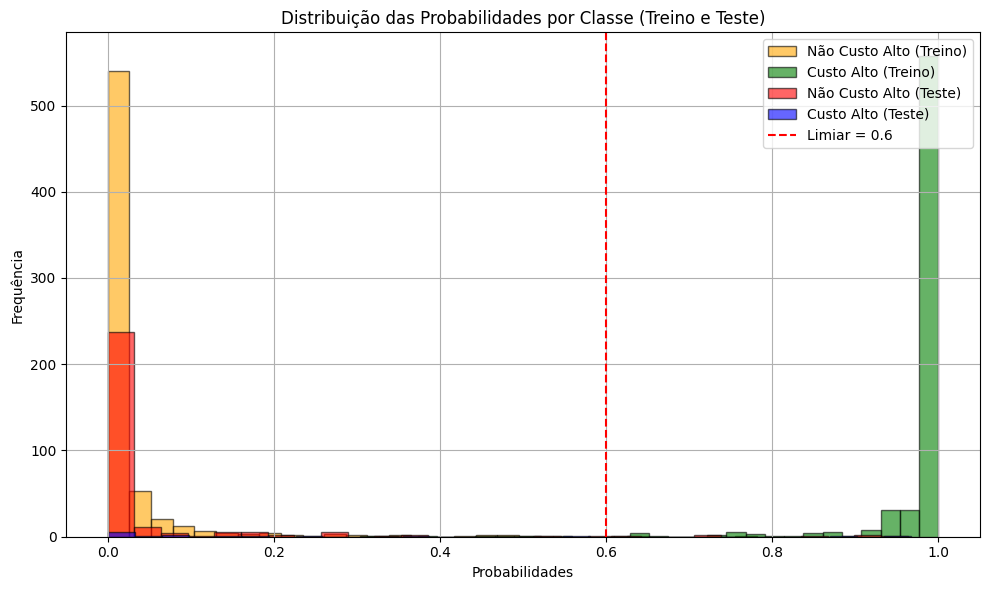

In [2]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt


model = joblib.load('best_model_lgb_grid.pkl')


train_df = pd.read_csv('sus_train_smote.csv')
test_df = pd.read_csv('sus_test.csv')


X_train = train_df.drop('H_COST', axis=1)
y_train = train_df['H_COST']

X_test = test_df.drop('H_COST', axis=1)
y_test = test_df['H_COST']


probs_train = model.predict_proba(X_train)[:, 1]
probs_test = model.predict_proba(X_test)[:, 1]


plt.figure(figsize=(10, 6))


prob_not_high_cost_train = probs_train[y_train == 0]
prob_high_cost_train = probs_train[y_train == 1]


prob_not_high_cost_test = probs_test[y_test == 0]
prob_high_cost_test = probs_test[y_test == 1]


threshold = 0.60


plt.hist(prob_not_high_cost_train, bins=30, color='orange', alpha=0.6, label='Não Custo Alto (Treino)', edgecolor='black')
plt.hist(prob_high_cost_train, bins=30, color='green', alpha=0.6, label='Custo Alto (Treino)', edgecolor='black')

plt.hist(prob_not_high_cost_test, bins=30, color='red', alpha=0.6, label='Não Custo Alto (Teste)', edgecolor='black')
plt.hist(prob_high_cost_test, bins=30, color='blue', alpha=0.6, label='Custo Alto (Teste)', edgecolor='black')


plt.axvline(x=threshold, color='red', linestyle='--', label=f'Limiar = {threshold}')


plt.xlabel('Probabilidades')
plt.ylabel('Frequência')
plt.title('Distribuição das Probabilidades por Classe (Treino e Teste)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()


plt.show()


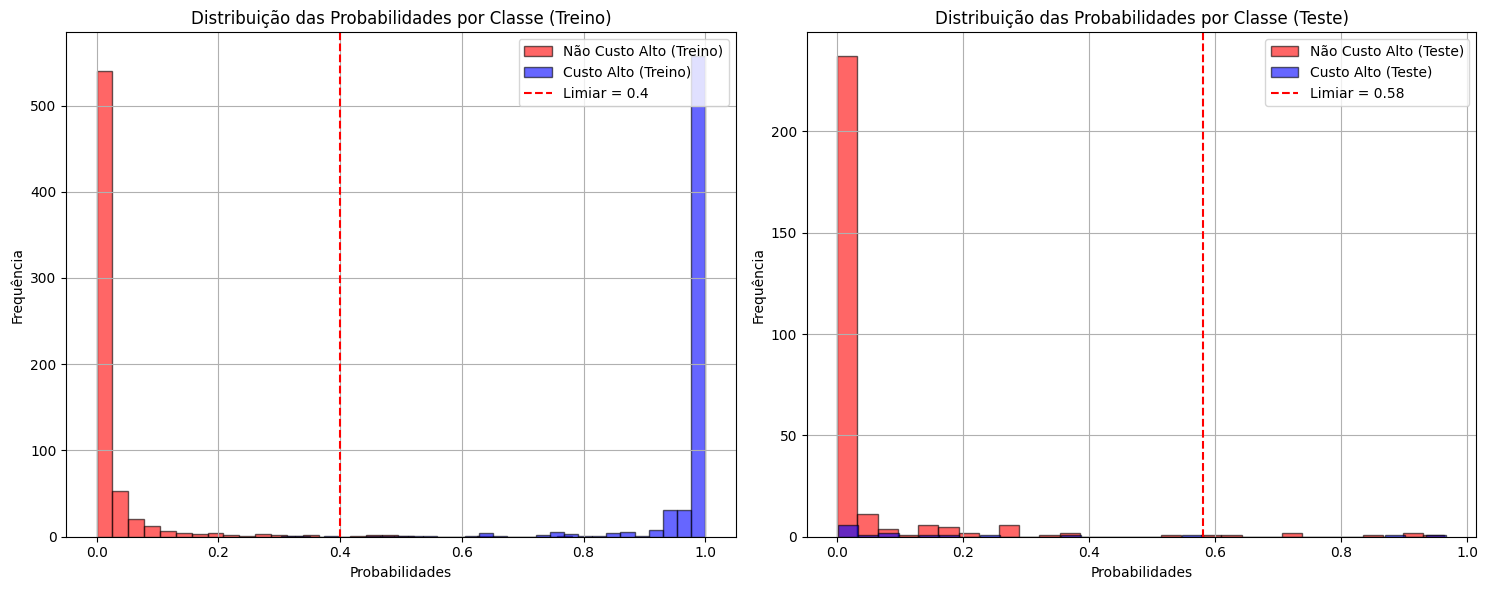

In [4]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt


model = joblib.load('best_model_lgb_grid.pkl')

train_df = pd.read_csv('sus_train_smote.csv')
test_df = pd.read_csv('sus_test.csv')


X_train = train_df.drop('H_COST', axis=1)
y_train = train_df['H_COST']

X_test = test_df.drop('H_COST', axis=1)
y_test = test_df['H_COST']


probs_train = model.predict_proba(X_train)[:, 1]
probs_test = model.predict_proba(X_test)[:, 1]


threshold_train = 0.4
threshold_test = 0.58


plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)

prob_not_high_cost_train = probs_train[y_train == 0]
prob_high_cost_train = probs_train[y_train == 1]

plt.hist(prob_not_high_cost_train, bins=30, color='red', alpha=0.6, label='Não Custo Alto (Treino)', edgecolor='black')
plt.hist(prob_high_cost_train, bins=30, color='blue', alpha=0.6, label='Custo Alto (Treino)', edgecolor='black')
plt.axvline(x=threshold_train, color='red', linestyle='--', label=f'Limiar = {threshold_train}')
plt.xlabel('Probabilidades')
plt.ylabel('Frequência')
plt.title('Distribuição das Probabilidades por Classe (Treino)')
plt.legend(loc='best')
plt.grid(True)


plt.subplot(1, 2, 2)

prob_not_high_cost_test = probs_test[y_test == 0]
prob_high_cost_test = probs_test[y_test == 1]

plt.hist(prob_not_high_cost_test, bins=30, color='red', alpha=0.6, label='Não Custo Alto (Teste)', edgecolor='black')
plt.hist(prob_high_cost_test, bins=30, color='blue', alpha=0.6, label='Custo Alto (Teste)', edgecolor='black')
plt.axvline(x=threshold_test, color='red', linestyle='--', label=f'Limiar = {threshold_test}')
plt.xlabel('Probabilidades')
plt.ylabel('Frequência')
plt.title('Distribuição das Probabilidades por Classe (Teste)')
plt.legend(loc='best')
plt.grid(True)


plt.tight_layout()

plt.show()
